In [ ]:
import torch
import math
from matplotlib import pyplot as plt
import torch.nn as nn

N = 1000               # numero total de amostras do dataset
NOISE = 25.           # intensidade do ruido de coleta no dataset
SPLIT_RATIO = 0.5     # porcentagem de dados usados no dataset de treino
BATCH_SIZE = 10       # tamanho do batch usado durante o treinamento
LEARNING_RATE = 0.03  # taxa de aprendizado

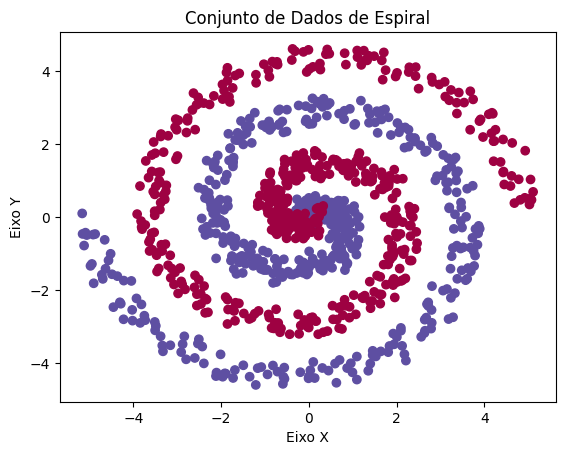

In [ ]:
def genSpiral(delta_t, label):
    r = 5*torch.linspace(0., 1., N//2+1)[:N//2]
    t = 0.7*r*math.pi + delta_t
    x0 = r*torch.sin(t)
    x1 = r*torch.cos(t)
    y = label*torch.ones_like(x0)
    x = torch.stack((x0, x1), -1)
    sampled_noise = (NOISE/70.)*(2*torch.rand(N//2, 2) - 1.)
    x += sampled_noise
    return x, y

class SpiralDataset:
    def __init__(self):
        xp, yp = genSpiral(0, 1) # positive samples
        xn, yn = genSpiral(math.pi, -1) # negative samples
        self.X = torch.cat((xp, xn))
        self.Y = torch.cat((yp, yn))

# TODO: plotar dataset gerado
# Criar instância do conjunto de dados de espiral
conjunto_espiral = SpiralDataset()

# Extrair dados
X = conjunto_espiral.X.numpy()
Y = conjunto_espiral.Y.numpy()

# Gráfico de dispersão
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Spectral)
plt.title('Conjunto de Dados de Espiral')
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.show()

# Nova seção

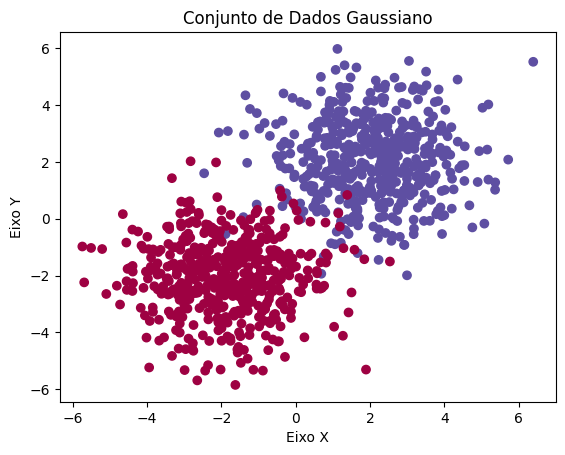

In [ ]:
def genGauss(cx0, cx1, label):
    x = 0.7*torch.randn(N//2, 2)
    x = torch.tensor([cx0, cx1]) + x + x*(NOISE/25.)
    y = label*torch.ones(N//2)
    return x, y

class GaussDataset:
    def __init__(self):
        xp, yp = genGauss(2, 2, 1) # positive samples
        xn, yn = genGauss(-2, -2, -1) # negative samples
        self.X = torch.cat((xp, xn))
        self.Y = torch.cat((yp, yn))

# TODO: plotar dataset gerado
# Criar instância do conjunto de dados gaussiano
conjunto_gaussiano = GaussDataset()

# Extrair dados
X_gauss = conjunto_gaussiano.X.numpy()
Y_gauss = conjunto_gaussiano.Y.numpy()

# Gráfico de dispersão
plt.scatter(X_gauss[:, 0], X_gauss[:, 1], c=Y_gauss, cmap=plt.cm.Spectral)
plt.title('Conjunto de Dados Gaussiano')
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.show()

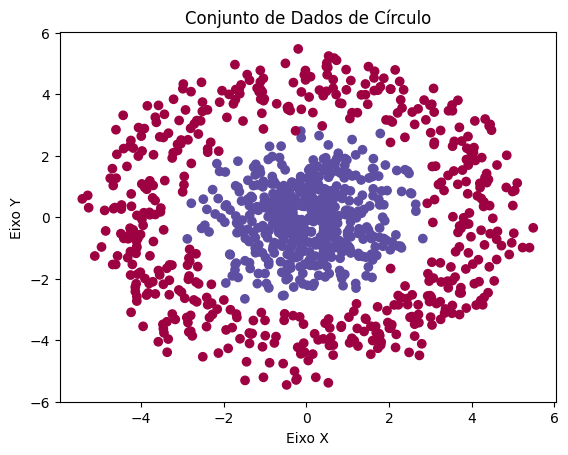

In [ ]:
def genCircle(r_min, r_max, label):
    r = (r_max - r_min)*torch.rand(N//2) + r_min
    angle = 2*math.pi*torch.rand(N//2)
    x0 = r*torch.sin(angle)
    x1 = r*torch.cos(angle)
    x = torch.stack((x0, x1), -1)
    sampled_noise = (NOISE/35.)*(2*torch.rand(N//2, 2) - 1.)
    x += sampled_noise
    y = label*torch.ones_like(x0)
    return x, y

class CircleDataset:
    def __init__(self):
        xp, yp = genCircle(0, 2.5, 1) # positive samples
        xn, yn = genCircle(3.5, 5, -1) # negative samples
        self.X = torch.cat((xp, xn))
        self.Y = torch.cat((yp, yn))

# TODO: plotar dataset gerado
# Criar instância do conjunto de dados de círculo
conjunto_circulo = CircleDataset()

# Extrair dados
X_circulo = conjunto_circulo.X.numpy()
Y_circulo = conjunto_circulo.Y.numpy()

# Gráfico de dispersão
plt.scatter(X_circulo[:, 0], X_circulo[:, 1], c=Y_circulo, cmap=plt.cm.Spectral)
plt.title('Conjunto de Dados de Círculo')
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.show()

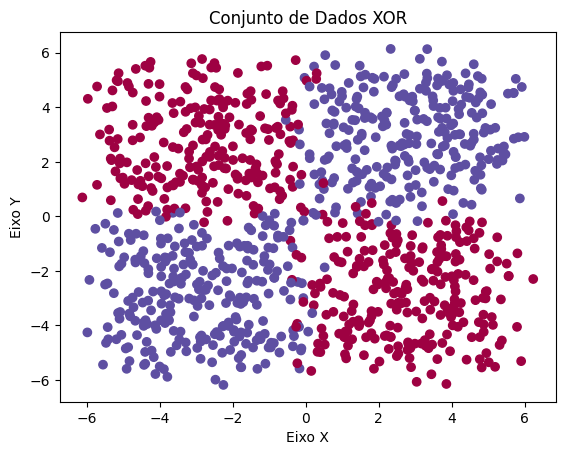

In [ ]:
def genXOR():
    x = 10.*torch.rand(N, 2) - 5.
    y = torch.sign(x[:,0]*x[:,1])
    padding = 0.3
    x += torch.sign(x)*padding
    sampled_noise = (NOISE/25.)*(2*torch.rand(N, 2) - 1.)
    x += sampled_noise
    return x, y

class XORDataset:
    def __init__(self):
        self.X, self.Y = genXOR()

# TODO: plotar dataset gerado

# Criar instância do conjunto de dados XOR
conjunto_xor = XORDataset()

# Extrair dados
X_xor = conjunto_xor.X.numpy()
Y_xor = conjunto_xor.Y.numpy()

# Gráfico de dispersão
plt.scatter(X_xor[:, 0], X_xor[:, 1], c=Y_xor, cmap=plt.cm.Spectral)
plt.title('Conjunto de Dados XOR')
plt.xlabel('Eixo X')
plt.ylabel('Eixo Y')
plt.show()

In [ ]:
# TODO
def train_test_split(dataset, split_ratio=SPLIT_RATIO):
    num_train = int(N * split_ratio)
    indices = torch.randperm(N)
    train_indices = indices[:num_train]
    test_indices = indices[num_train:]

    train_data = (dataset.X[train_indices], dataset.Y[train_indices])
    test_data = (dataset.X[test_indices], dataset.Y[test_indices])

    return train_data, test_data


In [ ]:
# TODO
class Neuron(nn.Module):
    def __init__(self, input_size):
        super(Neuron, self).__init__()
        self.weights = nn.Parameter(torch.randn(input_size, 1))
        self.bias = nn.Parameter(torch.randn(1))

    def inference(self, inp):
        return torch.sigmoid(inp @ self.weights + self.bias)

class Model:
    def __init__(self, input_size):
        self.neuron = Neuron(input_size)

    def inference(self, inp):
        return self.neuron.inference(inp)



In [ ]:
# TODO
def get_loss(y, y_hat):
    y_normalized = torch.sigmoid(y.view(-1, 1))
    return torch.nn.functional.binary_cross_entropy(y_hat, y_normalized)


Epoch 0: Train Loss: 1.198561191558838, Test Loss: 0.832687258720398
Epoch 10: Train Loss: 0.6849743127822876, Test Loss: 0.6884870529174805
Epoch 20: Train Loss: 0.6828380823135376, Test Loss: 0.6884558200836182
Epoch 30: Train Loss: 0.7091326117515564, Test Loss: 0.6884550452232361
Epoch 40: Train Loss: 0.7038024067878723, Test Loss: 0.6884549856185913
Epoch 50: Train Loss: 0.6925626993179321, Test Loss: 0.6884548664093018
Epoch 60: Train Loss: 0.6908025741577148, Test Loss: 0.6884548664093018
Epoch 70: Train Loss: 0.6792450547218323, Test Loss: 0.6884548664093018
Epoch 80: Train Loss: 0.6843265295028687, Test Loss: 0.6884548664093018
Epoch 90: Train Loss: 0.7144568562507629, Test Loss: 0.6884548664093018


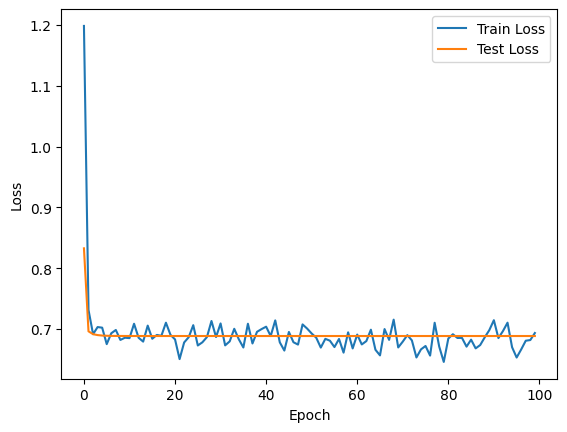

In [ ]:
# TODO
def train_loop(model, train_data, test_data, num_epochs=100, learning_rate=LEARNING_RATE, batch_size=BATCH_SIZE):
   optimizer = torch.optim.SGD(model.neuron.parameters(), lr=learning_rate)
   train_losses = []
   test_losses = []

   for epoch in range(num_epochs):
       model.neuron.train()
       optimizer.zero_grad()
       X_train, Y_train = train_data
       train_indices = torch.randperm(len(X_train))
       for i in range(0, len(X_train), batch_size):
           batch_indices = train_indices[i:i+batch_size]
           X_batch = X_train[batch_indices]
           Y_batch = Y_train[batch_indices]
           y_hat_train = model.inference(X_batch)
           loss_train = get_loss(Y_batch, y_hat_train)
           loss_train.backward()

       optimizer.step()

       model.neuron.eval()
       X_test, Y_test = test_data
       y_hat_test = model.inference(X_test)
       loss_test = get_loss(Y_test, y_hat_test)

       train_losses.append(loss_train.item())
       test_losses.append(loss_test.item())

       if epoch % 10 == 0:
           print(f"Epoch {epoch}: Train Loss: {loss_train.item()}, Test Loss: {loss_test.item()}")

   return train_losses, test_losses
# TODO: plotar as curvas de loss nos datasets de treino e test durante o treinamento

def plot_loss_curves(train_losses, test_losses):
    plt.plot(train_losses, label='Train Loss')
    plt.plot(test_losses, label='Test Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Usando os datasets gerados acima para treino e teste
spiral_train, spiral_test = train_test_split(SpiralDataset())
model = Model(input_size=2)
train_losses, test_losses = train_loop(model, spiral_train, spiral_test)
plot_loss_curves(train_losses, test_losses)


In [ ]:
# dica:
torch.randperm(4)
torch.rand(3)

tensor([0.2196, 0.4474, 0.8168])